# EDA e pesquisa de clusterização com os dados mockados

### Inspiração
- **Cuba 1961**: Brigadas de alfabetização (ação coletiva)
- **Finlândia**: Individualização do suporte educacional
- **IA como solução**: Suprir a falta de recursos humanos no Brasil

### Metodologia
1. **Segmentação por Desempenho**: Baixo (0-4), Médio (4-7), Alto (7-10)
2. **Análise de Fatores Sociais**: Trabalho, Renda, Deslocamento, Internet, etc.
3. **Identificação de Padrões**: Quais fatores predominam em cada grupo?
4. **Outputs para Frontend**: Dados estruturados para dashboard
5. **Insights para LLM**: Resumos e ações para grupos de risco

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10


In [244]:

df = pd.read_csv('dados_alunos.csv')


df.head()

,ID,Escola,Endereco_Escola,Serie,Turma,Nome_Aluno,Genero,Idade_Aluno,CPF_Aluno,Telefone_Aluno,...,Frequencia_Percentual,Cor_Raca,Area_Climatica,Impacto_Seca,Area_Risco_Ambiental,Seguranca_Trajeto,Refeicoes_Diarias,Seguranca_Alimentar,Ambiente_Familiar,Responsabilidades_Casa
0,1,ECIT João Goulart,"R. Cônego Francisco Lima, SN - Castelo Branco,...",1º Ano,1A,João Fernandes Lima,M,15,328.242.854-23,(83) 99385-9935,...,70,Parda,Urbano Litorâneo,Não Afetado,Não,Inseguro,4,Segura,Tranquilo,Moderadas
1,2,ECIT João Goulart,"R. Cônego Francisco Lima, SN - Castelo Branco,...",1º Ano,1A,Valentina Alves Correia,F,16,818.799.763-19,(83) 99247-3803,...,80,Branca,Urbano,Não Afetado,Risco Baixo,Inseguro,3,Segura,Tranquilo,Poucas
2,3,ECIT João Goulart,"R. Cônego Francisco Lima, SN - Castelo Branco,...",1º Ano,1A,Vinicius Moreira Araújo,M,16,887.756.448-24,(83) 98601-8123,...,70,Parda,Urbano Litorâneo,Levemente Afetado,Risco Baixo,Seguro,1,Moderada Insegurança,Tranquilo,Moderadas
3,4,ECIT João Goulart,"R. Cônego Francisco Lima, SN - Castelo Branco,...",1º Ano,1A,Beatriz Pereira Pereira,F,15,446.121.702-80,(83) 98471-4608,...,70,Branca,Urbano Litorâneo,Levemente Afetado,Não,Pouco Seguro,2,Grave Insegurança,Tranquilo,Muitas
4,5,ECIT João Goulart,"R. Cônego Francisco Lima, SN - Castelo Branco,...",1º Ano,1A,Ricardo Almeida Almeida,M,15,985.510.160-31,(83) 98776-1035,...,70,Preta,Interior Semiárido,Levemente Afetado,Risco Médio,Inseguro,3,Segura,Tranquilo,Muitas


## Divindo por notas

- **Baixo (0-4)**: Necessita intervenção urgente
- **Médio (4-7)**: Pode melhorar com suporte
- **Alto (7-10)**: Desempenho satisfatório


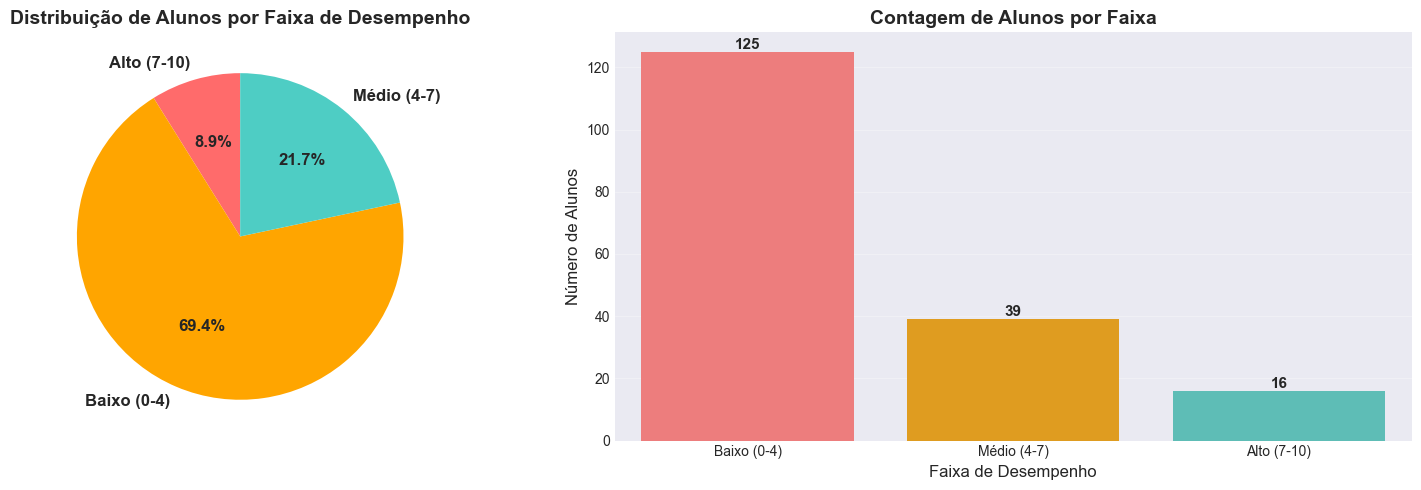


📈 Média por Faixa:
                  count  mean   std   min   25%   50%   75%   max
Faixa_Desempenho                                                 
Alto (7-10)        16.0  7.49  0.42  7.01  7.27  7.40  7.63  8.79
Baixo (0-4)       125.0  1.09  1.11  0.00  0.18  0.77  1.80  3.97
Médio (4-7)        39.0  5.43  0.96  4.07  4.50  5.45  6.28  6.90


In [245]:
def categorizar_desempenho(nota):
    if nota < 4.0:
        return 'Baixo (0-4)'
    elif nota < 7.0:
        return 'Médio (4-7)'
    else:
        return 'Alto (7-10)'

df['Faixa_Desempenho'] = df['Media_Geral'].apply(categorizar_desempenho)
distribuicao = df['Faixa_Desempenho'].value_counts().sort_index()

# Gráfico de distribuição
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Pizza
colors = ['#FF6B6B', '#FFA500', '#4ECDC4']
axes[0].pie(distribuicao.values, labels=distribuicao.index, autopct='%1.1f%%',
           colors=colors, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Distribuição de Alunos por Faixa de Desempenho', fontsize=14, weight='bold')

# Barras
sns.countplot(data=df, x='Faixa_Desempenho', order=['Baixo (0-4)', 'Médio (4-7)', 'Alto (7-10)'],
             palette=colors, ax=axes[1])
axes[1].set_title('Contagem de Alunos por Faixa', fontsize=14, weight='bold')
axes[1].set_xlabel('Faixa de Desempenho', fontsize=12)
axes[1].set_ylabel('Número de Alunos', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

print("\n📈 Média por Faixa:")
print(df.groupby('Faixa_Desempenho')['Media_Geral'].describe().round(2))


###  Trabalho Fora da Escola

Trabalha_Fora      Não   Sim
Faixa_Desempenho            
Alto (7-10)       87.5  12.5
Baixo (0-4)       46.4  53.6
Médio (4-7)       61.5  38.5


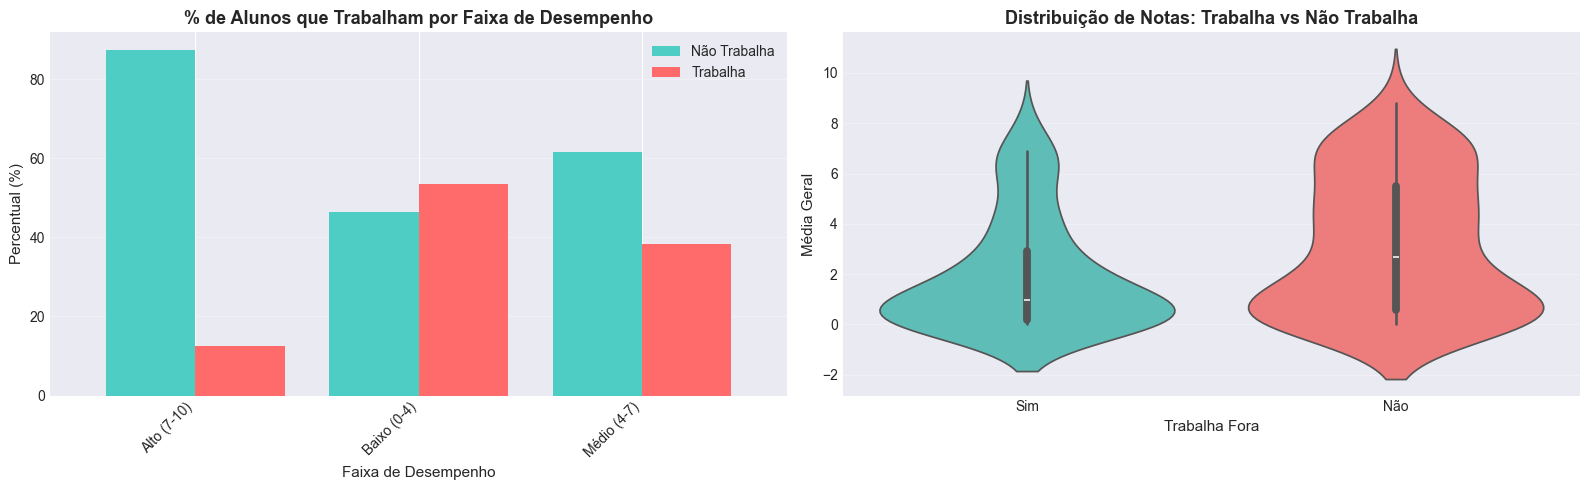

               count  mean   std  min   25%   50%   75%   max
Trabalha_Fora                                                
Não             96.0  3.13  2.70  0.0  0.58  2.68  5.50  8.79
Sim             84.0  1.99  2.25  0.0  0.18  0.99  2.94  7.85

Diferença de média: 1.13 pontos

Alunos que trabalham têm média 1.13 pontos MENOR!


In [249]:
trabalho_por_faixa = pd.crosstab(df['Faixa_Desempenho'], df['Trabalha_Fora'], normalize='index') * 100

print(trabalho_por_faixa.round(1))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

trabalho_por_faixa.plot(kind='bar', ax=axes[0], color=['#4ECDC4', '#FF6B6B'], width=0.8)
axes[0].set_title('% de Alunos que Trabalham por Faixa de Desempenho', fontsize=13, weight='bold')
axes[0].set_xlabel('Faixa de Desempenho', fontsize=11)
axes[0].set_ylabel('Percentual (%)', fontsize=11)
axes[0].legend(['Não Trabalha', 'Trabalha'], fontsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

sns.violinplot(data=df, x='Trabalha_Fora', y='Media_Geral', ax=axes[1], palette=['#4ECDC4', '#FF6B6B'])
axes[1].set_title('Distribuição de Notas: Trabalha vs Não Trabalha', fontsize=13, weight='bold')
axes[1].set_xlabel('Trabalha Fora', fontsize=11)
axes[1].set_ylabel('Média Geral', fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(df.groupby('Trabalha_Fora')['Media_Geral'].describe().round(2))
diff = df.groupby('Trabalha_Fora')['Media_Geral'].mean()['Não'] - df.groupby('Trabalha_Fora')['Media_Geral'].mean()['Sim']
print(f"\nDiferença de média: {diff:.2f} pontos")
print(f"\nAlunos que trabalham têm média {diff:.2f} pontos MENOR!")

### 4.2 Renda Familiar


IMPACTO DA RENDA FAMILIAR
Renda por faixa:
                    mean  median
Faixa_Desempenho                
Alto (7-10)       2610.0  2500.0
Baixo (0-4)       1692.0  1500.0
Médio (4-7)       2351.0  2500.0


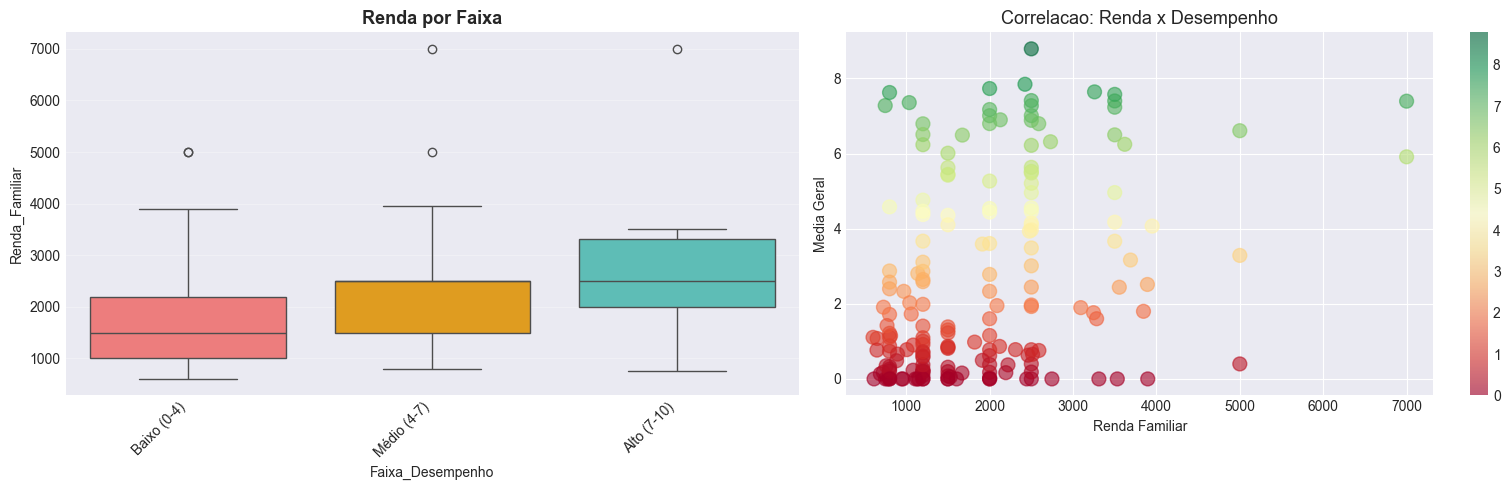


Correlacao (Renda x Nota): 0.361


In [227]:
# Analise: Renda x Desempenho
print("\nIMPACTO DA RENDA FAMILIAR")
print("="*80)

renda_por_faixa = df.groupby('Faixa_Desempenho')['Renda_Familiar'].agg(['mean', 'median'])
print("Renda por faixa:")
print(renda_por_faixa.round(0))

# Visualizacao
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

order = ['Baixo (0-4)', 'Médio (4-7)', 'Alto (7-10)']
sns.boxplot(data=df, x='Faixa_Desempenho', y='Renda_Familiar', order=order, palette=['#FF6B6B', '#FFA500', '#4ECDC4'], ax=axes[0])
axes[0].set_title('Renda por Faixa', fontsize=13, weight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

scatter = axes[1].scatter(df['Renda_Familiar'], df['Media_Geral'], c=df['Media_Geral'], cmap='RdYlGn', s=100, alpha=0.6)
axes[1].set_title('Correlacao: Renda x Desempenho', fontsize=13)
axes[1].set_xlabel('Renda Familiar')
axes[1].set_ylabel('Media Geral')
plt.colorbar(scatter, ax=axes[1])

plt.tight_layout()
plt.show()

corr = df['Renda_Familiar'].corr(df['Media_Geral'])
print(f"\nCorrelacao (Renda x Nota): {corr:.3f}")

## 5. Score de Risco Social

### COR/RAÇA/ETNIA 


IMPACTO DE COR/RAÇA NO DESEMPENHO
Distribuicao de Cor/Raca por Faixa de Desempenho (%):
Cor_Raca          Branca  Indígena  Parda  Preta
Faixa_Desempenho                                
Alto (7-10)         62.5       6.2   18.8   12.5
Baixo (0-4)         16.0       3.2   36.8   44.0
Médio (4-7)         71.8       2.6    5.1   20.5


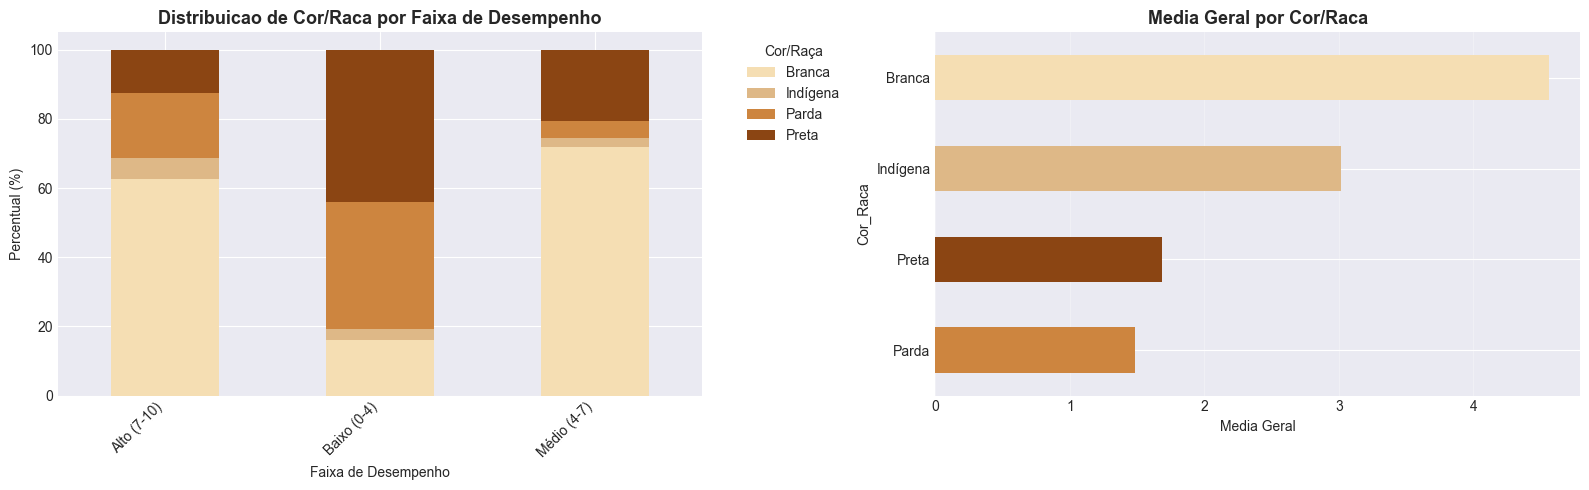


Media por Cor/Raca:
          mean  count
Cor_Raca             
Branca    4.56     58
Indígena  3.01      6
Parda     1.49     51
Preta     1.68     65


In [254]:
print("IMPACTO DE COR/RAÇA NO DESEMPENHO")
print("="*80)

cor_por_faixa = pd.crosstab(df['Faixa_Desempenho'], df['Cor_Raca'], normalize='index') * 100
print("Distribuicao de Cor/Raca por Faixa de Desempenho (%):")
print(cor_por_faixa.round(1))

# Mapeamento de cores consistente para cada categoria de Cor/Raça
cores_cor_raca = {
    'Branca': '#F5DEB3',      # Wheat (bege claro)
    'Parda': '#CD853F',       # Peru
    'Preta': '#8B4513',       # SaddleBrown
    'Indígena': '#DEB887'     # BurlyWood
}

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico 1: Barras empilhadas - aplicar cores na ordem das colunas
cores_grafico1 = [cores_cor_raca[col] for col in cor_por_faixa.columns]
cor_por_faixa.plot(kind='bar', stacked=True, ax=axes[0], color=cores_grafico1)
axes[0].set_title('Distribuicao de Cor/Raca por Faixa de Desempenho', fontsize=13, weight='bold')
axes[0].set_xlabel('Faixa de Desempenho')
axes[0].set_ylabel('Percentual (%)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].legend(title='Cor/Raça', bbox_to_anchor=(1.05, 1))

# Gráfico 2: Barras horizontais - aplicar cores na ordem ordenada
media_por_cor = df.groupby('Cor_Raca')['Media_Geral'].mean().sort_values()
cores_grafico2 = [cores_cor_raca[cor] for cor in media_por_cor.index]
media_por_cor.plot(kind='barh', ax=axes[1], color=cores_grafico2)
axes[1].set_title('Media Geral por Cor/Raca', fontsize=13, weight='bold')
axes[1].set_xlabel('Media Geral')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nMedia por Cor/Raca:")
print(df.groupby('Cor_Raca')['Media_Geral'].agg(['mean', 'count']).round(2))

pretos_pardos_baixo = df[(df['Cor_Raca'].isin(['Preta', 'Parda', 'Indígena'])) & (df['Faixa_Desempenho'] == 'Baixo (0-4)')]
total_baixo = len(df[df['Faixa_Desempenho'] == 'Baixo (0-4)'])

if total_baixo > 0:
    pct = len(pretos_pardos_baixo) / total_baixo * 100
else:

    pretos_pardos_medio = df[(df['Cor_Raca'].isin(['Preta', 'Parda', 'Indígena'])) & (df['Faixa_Desempenho'] == 'Médio (4-7)')]
    total_medio = len(df[df['Faixa_Desempenho'] == 'Médio (4-7)'])
    if total_medio > 0:
        pct = len(pretos_pardos_medio) / total_medio * 100
        print(f"\nNa faixa MÉDIA: {pct:.1f}% sao pretos/pardos/indigenas ({len(pretos_pardos_medio)} alunos)")

### SEGURANÇA ALIMENTAR

IMPACTO DA SEGURANCA ALIMENTAR
Seguranca Alimentar por Faixa de Desempenho (%):
Seguranca_Alimentar  Grave Insegurança  Leve Insegurança  \
Faixa_Desempenho                                           
Alto (7-10)                       12.5              18.8   
Baixo (0-4)                        9.6              25.6   
Médio (4-7)                        0.0               7.7   

Seguranca_Alimentar  Moderada Insegurança  Segura  
Faixa_Desempenho                                   
Alto (7-10)                           0.0    68.8  
Baixo (0-4)                          17.6    47.2  
Médio (4-7)                           0.0    92.3  


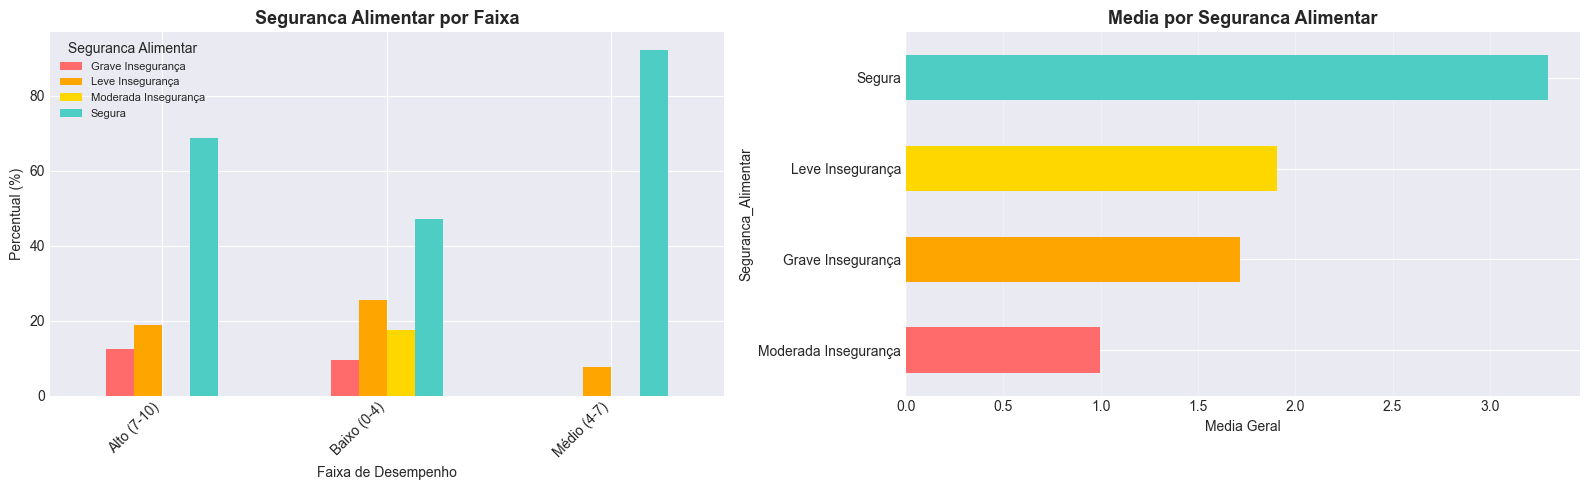


Refeicoes Diarias - Estatisticas:
                  mean  min  max
Faixa_Desempenho                
Alto (7-10)       2.88    1    4
Baixo (0-4)       2.52    1    4
Médio (4-7)       3.10    2    4

 14 alunos em GRAVE inseguranca alimentar!


In [256]:
print("IMPACTO DA SEGURANCA ALIMENTAR")
print("="*80)

alim_por_faixa = pd.crosstab(df['Faixa_Desempenho'], df['Seguranca_Alimentar'], normalize='index') * 100
print("Seguranca Alimentar por Faixa de Desempenho (%):")
print(alim_por_faixa.round(1))

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

alim_por_faixa.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#FFA500', '#FFD700', '#4ECDC4'])
axes[0].set_title('Seguranca Alimentar por Faixa', fontsize=13, weight='bold')
axes[0].set_xlabel('Faixa de Desempenho')
axes[0].set_ylabel('Percentual (%)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].legend(title='Seguranca Alimentar', fontsize=8)

media_por_seg_alim = df.groupby('Seguranca_Alimentar')['Media_Geral'].mean().sort_values()
media_por_seg_alim.plot(kind='barh', ax=axes[1], color=['#FF6B6B', '#FFA500', '#FFD700', '#4ECDC4'])
axes[1].set_title('Media por Seguranca Alimentar', fontsize=13, weight='bold')
axes[1].set_xlabel('Media Geral')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nRefeicoes Diarias - Estatisticas:")
print(df.groupby('Faixa_Desempenho')['Refeicoes_Diarias'].agg(['mean', 'min', 'max']).round(2))

inseg_grave = len(df[df['Seguranca_Alimentar'].str.contains('Grave')])
if inseg_grave > 0:
    print(f"\n {inseg_grave} alunos em GRAVE inseguranca alimentar!")

### FATORES CLIMÁTICOS 

IMPACTO DE FATORES CLIMATICOS

Distribuicao por Area Climatica:
Area_Climatica
Interior Semiárido    60
Urbano Litorâneo      51
Agreste               50
Urbano                19
Name: count, dtype: int64

Impacto da Seca por Faixa (%):
Impacto_Seca      Levemente Afetado  Muito Afetado  Não Afetado
Faixa_Desempenho                                               
Alto (7-10)                    37.5            6.2         56.2
Baixo (0-4)                    33.6           22.4         44.0
Médio (4-7)                    25.6           30.8         43.6


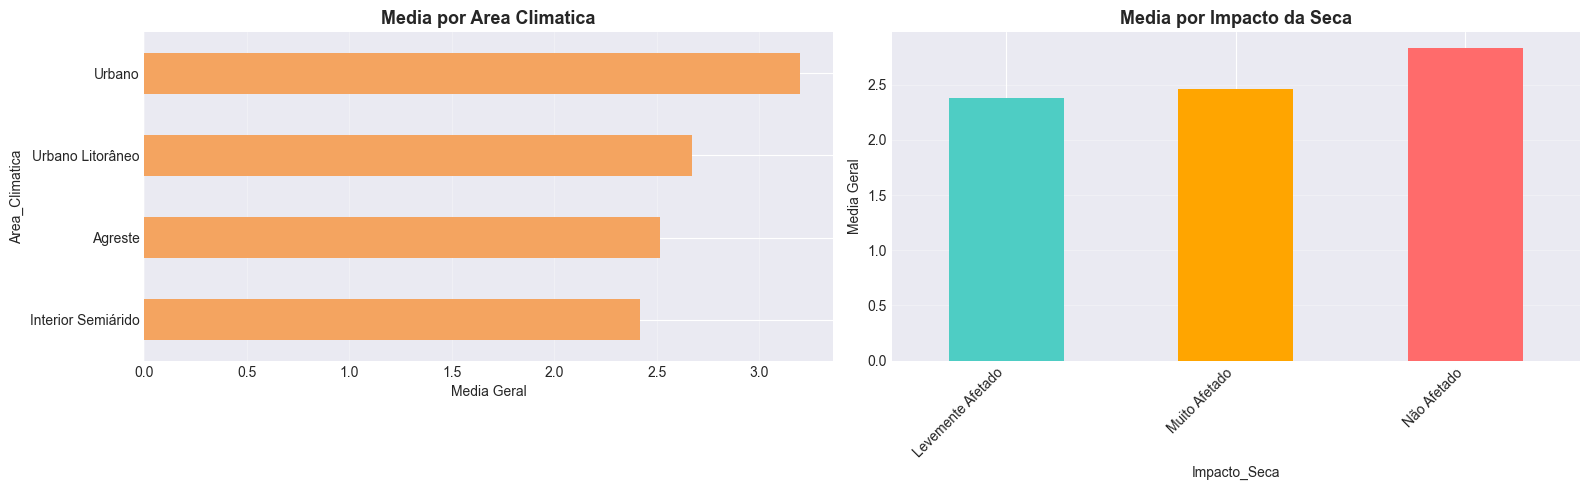


⚠️ 41 alunos MUITO afetados pela seca
Media deste grupo: 2.46


In [257]:

print("IMPACTO DE FATORES CLIMATICOS")
print("="*80)

print("\nDistribuicao por Area Climatica:")
print(df['Area_Climatica'].value_counts())

seca_por_faixa = pd.crosstab(df['Faixa_Desempenho'], df['Impacto_Seca'], normalize='index') * 100
print("\nImpacto da Seca por Faixa (%):")
print(seca_por_faixa.round(1))

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

media_por_area = df.groupby('Area_Climatica')['Media_Geral'].mean().sort_values()
media_por_area.plot(kind='barh', ax=axes[0], color='sandybrown')
axes[0].set_title('Media por Area Climatica', fontsize=13, weight='bold')
axes[0].set_xlabel('Media Geral')
axes[0].grid(True, alpha=0.3, axis='x')

media_por_seca = df.groupby('Impacto_Seca')['Media_Geral'].mean().sort_values()
media_por_seca.plot(kind='bar', ax=axes[1], color=['#4ECDC4', '#FFA500', '#FF6B6B'])
axes[1].set_title('Media por Impacto da Seca', fontsize=13, weight='bold')
axes[1].set_ylabel('Media Geral')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

muito_afetados = len(df[df['Impacto_Seca'] == 'Muito Afetado'])
print(f"\n⚠️ {muito_afetados} alunos MUITO afetados pela seca")
print(f"Media deste grupo: {df[df['Impacto_Seca'] == 'Muito Afetado']['Media_Geral'].mean():.2f}")

## 7. Clustering por Categorias de Fatores

Vamos criar **análises de clustering separadas** para cada categoria de fatores sociais.
Isso permite descobrir padrões específicos em cada dimensão!

In [258]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Preparar dados base
df_cluster = df.copy()

# Codificar variáveis básicas
df_cluster['Trabalha_Num'] = (df_cluster['Trabalha_Fora'] == 'Sim').astype(int)
df_cluster['Tem_Computador_Num'] = (df_cluster['Tem_Computador'] == 'Sim').astype(int)
df_cluster['Genero_Num'] = (df_cluster['Genero'] == 'F').astype(int)  # 0=M, 1=F

# Cor/Raça
cor_map = {'Branca': 0, 'Parda': 1, 'Preta': 2, 'Indígena': 3}
df_cluster['Cor_Raca_Num'] = df_cluster['Cor_Raca'].map(cor_map)

# Internet
internet_map = {'Não': 0, 'Apenas celular': 1, 'Sim (banda larga)': 2}
df_cluster['Internet_Num'] = df_cluster['Acesso_Internet'].map(internet_map)

# Segurança Alimentar
seg_alim_map = {'Grave Insegurança': 0, 'Moderada Insegurança': 1, 'Leve Insegurança': 2, 'Segura': 3}
df_cluster['Seg_Alimentar_Num'] = df_cluster['Seguranca_Alimentar'].map(seg_alim_map)

# Seca
seca_map = {'Não Afetado': 0, 'Levemente Afetado': 1, 'Muito Afetado': 2}
df_cluster['Seca_Num'] = df_cluster['Impacto_Seca'].map(seca_map)

# Trajeto
traj_map = {'Seguro': 0, 'Pouco Seguro': 1, 'Inseguro': 2}
df_cluster['Trajeto_Num'] = df_cluster['Seguranca_Trajeto'].map(traj_map)

### 7.1 Clustering: Fatores Socioeconômicos

🎯 CLUSTERING SOCIOECONÔMICO (K=4)
Silhouette Score: 0.319

Distribuição:
Cluster_Socio
0    52
1    39
2    45
3    44
Name: count, dtype: int64


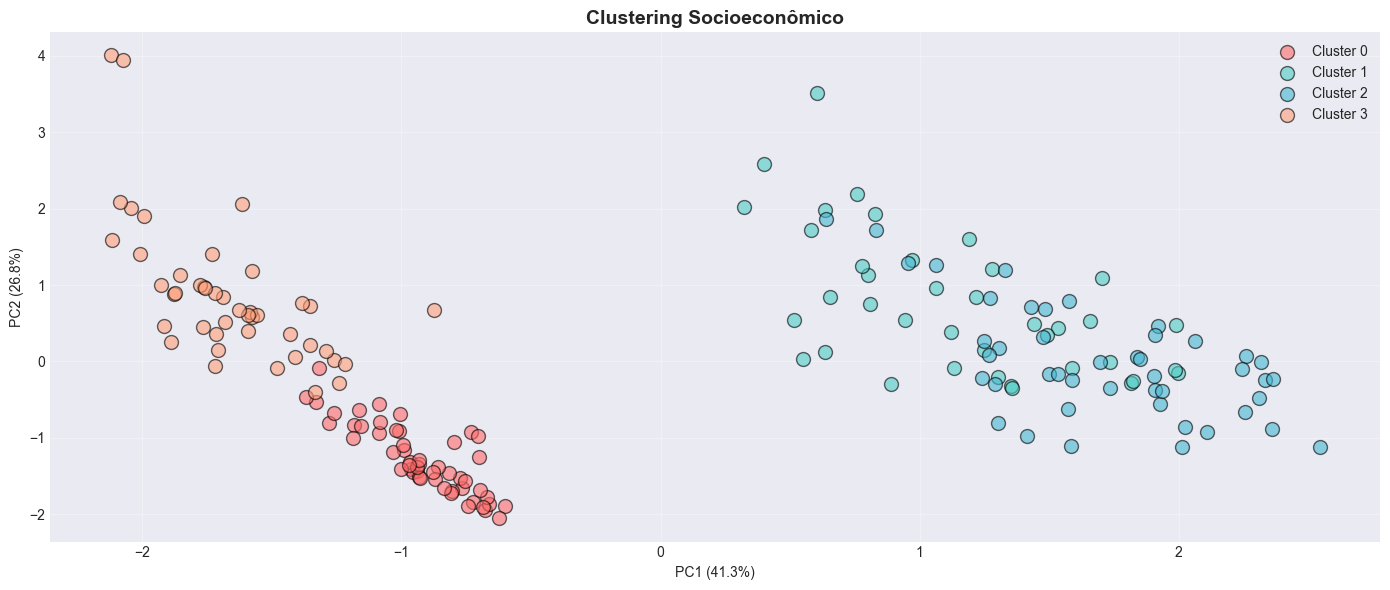


📊 PERFIL DOS CLUSTERS:

Cluster 0 (52 alunos):
  Média Geral: 1.05
  Renda Média: R$ 1146
  % Trabalha: 0.0%

Cluster 1 (39 alunos):
  Média Geral: 2.90
  Renda Média: R$ 1976
  % Trabalha: 100.0%

Cluster 2 (45 alunos):
  Média Geral: 1.20
  Renda Média: R$ 2024
  % Trabalha: 100.0%

Cluster 3 (44 alunos):
  Média Geral: 5.59
  Renda Média: R$ 2666
  % Trabalha: 0.0%


In [259]:
# Features socioeconômicas
features_socio = [
    'Media_Geral',
    'Renda_Familiar',
    'Trabalha_Num',
    'Horas_Trabalho_Semana',
    'Numero_Irmaos'
]

X_socio = df_cluster[features_socio].fillna(0)
scaler_socio = StandardScaler()
X_socio_scaled = scaler_socio.fit_transform(X_socio)

# K-Means com K=4
kmeans_socio = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['Cluster_Socio'] = kmeans_socio.fit_predict(X_socio_scaled)

print('🎯 CLUSTERING SOCIOECONÔMICO (K=4)')
print('='*80)
print(f'Silhouette Score: {silhouette_score(X_socio_scaled, df_cluster["Cluster_Socio"]):.3f}')
print(f'\nDistribuição:')
print(df_cluster['Cluster_Socio'].value_counts().sort_index())

# PCA para visualização
pca_socio = PCA(n_components=2)
X_socio_pca = pca_socio.fit_transform(X_socio_scaled)

plt.figure(figsize=(14, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
for i in range(4):
    mask = df_cluster['Cluster_Socio'] == i
    plt.scatter(X_socio_pca[mask, 0], X_socio_pca[mask, 1],
               c=colors[i], label=f'Cluster {i}', s=100, alpha=0.6, edgecolors='black')

plt.xlabel(f'PC1 ({pca_socio.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_socio.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Clustering Socioeconômico', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análise dos clusters
print('\n📊 PERFIL DOS CLUSTERS:')
for i in range(4):
    cluster_data = df_cluster[df_cluster['Cluster_Socio'] == i]
    print(f'\nCluster {i} ({len(cluster_data)} alunos):')
    print(f'  Média Geral: {cluster_data["Media_Geral"].mean():.2f}')
    print(f'  Renda Média: R$ {cluster_data["Renda_Familiar"].mean():.0f}')
    print(f'  % Trabalha: {(cluster_data["Trabalha_Fora"]=="Sim").sum()/len(cluster_data)*100:.1f}%')

#### 7.1.1 Análise por Turma: Socioeconômico

In [260]:
# Clustering Socioeconômico POR TURMA
print('\n📊 CLUSTERING SOCIOECONÔMICO POR TURMA')
print('='*80)

turmas_unicas = df_cluster['Turma'].unique()

for turma in sorted(turmas_unicas):
    df_turma = df_cluster[df_cluster['Turma'] == turma]
    
    print(f'\n{'='*80}')
    print(f'🎓 TURMA {turma} - {len(df_turma)} alunos')
    print(f'{'='*80}')
    
    if len(df_turma) < 10:
        print('⚠️ Turma muito pequena para clustering confiável')
        continue
    
    # Aplicar clustering
    X_turma = df_turma[features_socio].fillna(0)
    X_turma_scaled = scaler_socio.transform(X_turma)
    
    # K=3 para turmas (menos alunos)
    k_turma = min(3, len(df_turma) // 10)  # Pelo menos 10 alunos por cluster
    if k_turma < 2:
        k_turma = 2
    
    kmeans_turma = KMeans(n_clusters=k_turma, random_state=42, n_init=10)
    clusters_turma = kmeans_turma.fit_predict(X_turma_scaled)
    
    # Análise
    for i in range(k_turma):
        mask = clusters_turma == i
        cluster_alunos = df_turma[mask]
        
        if len(cluster_alunos) == 0:
            continue
        
        print(f'\nCluster {i}: {len(cluster_alunos)} alunos')
        print(f'  Média Geral: {cluster_alunos["Media_Geral"].mean():.2f}')
        print(f'  Renda média: R$ {cluster_alunos["Renda_Familiar"].mean():.0f}')
        print(f'  % Trabalha: {(cluster_alunos["Trabalha_Fora"]=="Sim").sum()/len(cluster_alunos)*100:.1f}%')
        
        # Alertas específicos
        if cluster_alunos['Media_Geral'].mean() < 4.0:
            print(f'  🚨 ALERTA: Grupo em RISCO!')
            print(f'     Alunos: {", ".join(cluster_alunos["Nome_Aluno"].head(5).tolist())}')
            if len(cluster_alunos) > 5:
                print(f'     ... e mais {len(cluster_alunos)-5} alunos')

print(f'\n{'='*80}')


📊 CLUSTERING SOCIOECONÔMICO POR TURMA

🎓 TURMA 1A - 30 alunos

Cluster 0: 10 alunos
  Média Geral: 1.09
  Renda média: R$ 2230
  % Trabalha: 100.0%
  🚨 ALERTA: Grupo em RISCO!
     Alunos: João Fernandes Lima, Gustavo Moreira Melo, Antônio Moreira Garcia, Laura Barbosa Barbosa, Giovanna Moreira Barbosa
     ... e mais 5 alunos

Cluster 1: 11 alunos
  Média Geral: 0.54
  Renda média: R$ 1115
  % Trabalha: 0.0%
  🚨 ALERTA: Grupo em RISCO!
     Alunos: Vinicius Moreira Araújo, Beatriz Pereira Pereira, André Lima Rodrigues, Vinicius Pereira Correia, Ricardo Souza Araújo
     ... e mais 6 alunos

Cluster 2: 9 alunos
  Média Geral: 5.69
  Renda média: R$ 2365
  % Trabalha: 0.0%

🎓 TURMA 1B - 30 alunos

Cluster 0: 4 alunos
  Média Geral: 7.26
  Renda média: R$ 3125
  % Trabalha: 25.0%

Cluster 1: 15 alunos
  Média Geral: 1.71
  Renda média: R$ 1286
  % Trabalha: 0.0%
  🚨 ALERTA: Grupo em RISCO!
     Alunos: Luiz Lima Carvalho, Natália Marques Costa, Alice Costa Lopes, Rita Silva Pereira, Dan

### 7.2 Clustering: Gênero e Cor/Raça

🎯 CLUSTERING GÊNERO/COR (K=4)
Silhouette Score: 0.271

Distribuição:
Cluster_Genero_Cor
0    53
1    42
2    49
3    36
Name: count, dtype: int64


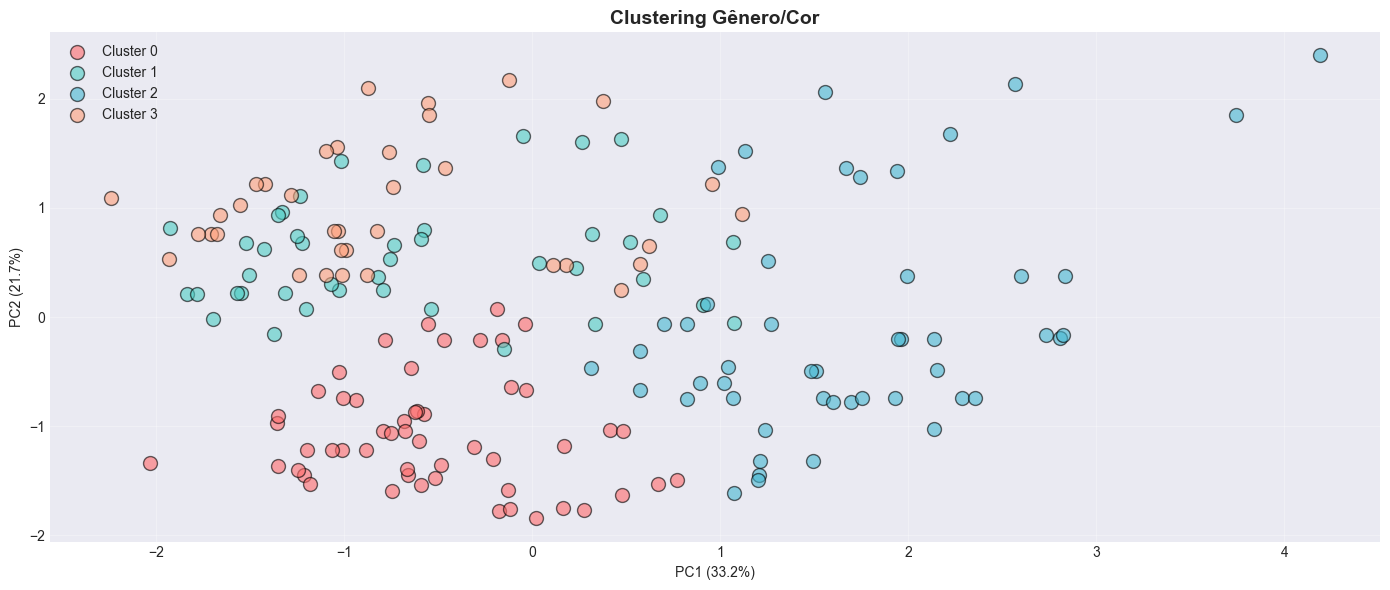


 PERFIL DOS CLUSTERS:

Cluster 0 (53 alunos):
  Média Geral: 1.04
  % Mulheres: 47.2%
  Cor/Raça:
{'Preta': 23, 'Parda': 16, 'Branca': 12, 'Indígena': 2}

Cluster 1 (42 alunos):
  Média Geral: 1.99
  % Mulheres: 0.0%
  Cor/Raça:
{'Preta': 20, 'Parda': 12, 'Branca': 8, 'Indígena': 2}

Cluster 2 (49 alunos):
  Média Geral: 5.77
  % Mulheres: 51.0%
  Cor/Raça:
{'Branca': 31, 'Parda': 10, 'Preta': 7, 'Indígena': 1}

Cluster 3 (36 alunos):
  Média Geral: 1.29
  % Mulheres: 100.0%
  Cor/Raça:
{'Preta': 15, 'Parda': 13, 'Branca': 7, 'Indígena': 1}


In [261]:
# Features de gênero/cor
features_genero_cor = [
    'Media_Geral',
    'Genero_Num',
    'Cor_Raca_Num',
    'Renda_Familiar',
    'Trabalha_Num'
]

X_genero = df_cluster[features_genero_cor].fillna(0)
scaler_genero = StandardScaler()
X_genero_scaled = scaler_genero.fit_transform(X_genero)

# K-Means com K=4
kmeans_genero = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['Cluster_Genero_Cor'] = kmeans_genero.fit_predict(X_genero_scaled)

print('🎯 CLUSTERING GÊNERO/COR (K=4)')
print('='*80)
print(f'Silhouette Score: {silhouette_score(X_genero_scaled, df_cluster["Cluster_Genero_Cor"]):.3f}')
print(f'\nDistribuição:')
print(df_cluster['Cluster_Genero_Cor'].value_counts().sort_index())

# PCA
pca_genero = PCA(n_components=2)
X_genero_pca = pca_genero.fit_transform(X_genero_scaled)

plt.figure(figsize=(14, 6))
for i in range(4):
    mask = df_cluster['Cluster_Genero_Cor'] == i
    plt.scatter(X_genero_pca[mask, 0], X_genero_pca[mask, 1],
               c=colors[i], label=f'Cluster {i}', s=100, alpha=0.6, edgecolors='black')

plt.xlabel(f'PC1 ({pca_genero.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_genero.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Clustering Gênero/Cor', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análise
print('\n PERFIL DOS CLUSTERS:')
for i in range(4):
    cluster_data = df_cluster[df_cluster['Cluster_Genero_Cor'] == i]
    print(f'\nCluster {i} ({len(cluster_data)} alunos):')
    print(f'  Média Geral: {cluster_data["Media_Geral"].mean():.2f}')
    print(f'  % Mulheres: {(cluster_data["Genero"]=="F").sum()/len(cluster_data)*100:.1f}%')
    print(f'  Cor/Raça:')
    print(cluster_data['Cor_Raca'].value_counts().to_dict())

#### Análise por Turma: Gênero/Cor

In [262]:
print('\n CLUSTERING GÊNERO/COR POR TURMA')
print('='*80)

for turma in sorted(turmas_unicas):
    df_turma = df_cluster[df_cluster['Turma'] == turma]
    
    print(f'\n{'='*80}')
    print(f'🎓 TURMA {turma} - {len(df_turma)} alunos')
    print(f'{'='*80}')
    
    if len(df_turma) < 10:
        print('⚠️ Turma muito pequena para clustering')
        continue
    
    X_turma = df_turma[features_genero_cor].fillna(0)
    X_turma_scaled = scaler_genero.transform(X_turma)
    
    k_turma = min(3, len(df_turma) // 10)
    if k_turma < 2:
        k_turma = 2
    
    kmeans_turma = KMeans(n_clusters=k_turma, random_state=42, n_init=10)
    clusters_turma = kmeans_turma.fit_predict(X_turma_scaled)
    
    for i in range(k_turma):
        mask = clusters_turma == i
        cluster_alunos = df_turma[mask]
        
        if len(cluster_alunos) == 0:
            continue
        
        pct_pretos_pardos = (cluster_alunos['Cor_Raca'].isin(['Preta', 'Parda', 'Indígena'])).sum() / len(cluster_alunos) * 100
        pct_mulheres = (cluster_alunos['Genero'] == 'F').sum() / len(cluster_alunos) * 100
        
        print(f'\nCluster {i}: {len(cluster_alunos)} alunos')
        print(f'  Média Geral: {cluster_alunos["Media_Geral"].mean():.2f}')
        print(f'  % Pretos/Pardos/Indígenas: {pct_pretos_pardos:.1f}%')
        print(f'  % Mulheres: {pct_mulheres:.1f}%')
        
        # Alerta para desigualdade
        if pct_pretos_pardos > 70 and cluster_alunos['Media_Geral'].mean() < 5.0:
            print(f'Desigualdade racial detectada')
            print(f'Média baixa com alta concentração de pretos/pardos/indígenas')

print(f'\n{'='*80}')


 CLUSTERING GÊNERO/COR POR TURMA

🎓 TURMA 1A - 30 alunos

Cluster 0: 11 alunos
  Média Geral: 0.54
  % Pretos/Pardos/Indígenas: 81.8%
  % Mulheres: 36.4%
Desigualdade racial detectada
Média baixa com alta concentração de pretos/pardos/indígenas

Cluster 1: 11 alunos
  Média Geral: 1.03
  % Pretos/Pardos/Indígenas: 81.8%
  % Mulheres: 54.5%
Desigualdade racial detectada
Média baixa com alta concentração de pretos/pardos/indígenas

Cluster 2: 8 alunos
  Média Geral: 6.35
  % Pretos/Pardos/Indígenas: 62.5%
  % Mulheres: 37.5%

🎓 TURMA 1B - 30 alunos

Cluster 0: 11 alunos
  Média Geral: 4.47
  % Pretos/Pardos/Indígenas: 0.0%
  % Mulheres: 27.3%

Cluster 1: 8 alunos
  Média Geral: 0.51
  % Pretos/Pardos/Indígenas: 100.0%
  % Mulheres: 62.5%
Desigualdade racial detectada
Média baixa com alta concentração de pretos/pardos/indígenas

Cluster 2: 11 alunos
  Média Geral: 1.63
  % Pretos/Pardos/Indígenas: 100.0%
  % Mulheres: 72.7%
Desigualdade racial detectada
Média baixa com alta concentração 

### Clustering: Segurança Alimentar e Clima

CLUSTERING SEGURANÇA ALIMENTAR (K=4)
Silhouette Score: 0.297

Distribuição:
Cluster_Alim
0    52
1    46
2    46
3    36
Name: count, dtype: int64


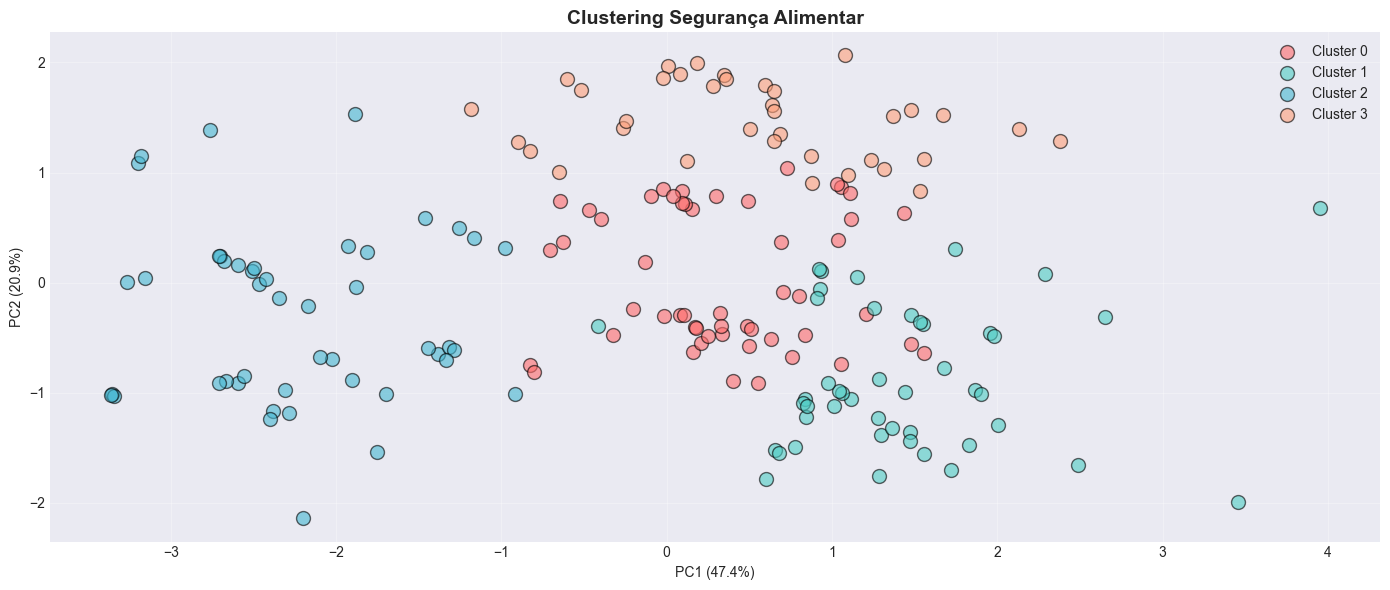


 PERFIL DOS CLUSTERS:

Cluster 0 (52 alunos):
  Média Geral: 1.02
  Refeições/dia: 3.1
  Seg. Alimentar:
{'Segura': 42, 'Leve Insegurança': 10}
  % Afetado por seca: 0.0%

Cluster 1 (46 alunos):
  Média Geral: 5.83
  Refeições/dia: 3.1
  Seg. Alimentar:
{'Segura': 39, 'Leve Insegurança': 7}
  % Afetado por seca: 2.2%

Cluster 2 (46 alunos):
  Média Geral: 1.17
  Refeições/dia: 1.5
  Seg. Alimentar:
{'Moderada Insegurança': 22, 'Grave Insegurança': 14, 'Leve Insegurança': 10}
  % Afetado por seca: 8.7%

Cluster 3 (36 alunos):
  Média Geral: 2.59
  Refeições/dia: 3.0
  Seg. Alimentar:
{'Segura': 25, 'Leve Insegurança': 11}
  % Afetado por seca: 100.0%


In [263]:
# Features de alimentação/clima
features_alim = [
    'Media_Geral',
    'Seg_Alimentar_Num',
    'Refeicoes_Diarias',
    'Seca_Num',
    'Renda_Familiar'
]

X_alim = df_cluster[features_alim].fillna(0)
scaler_alim = StandardScaler()
X_alim_scaled = scaler_alim.fit_transform(X_alim)

# K-Means com K=4
kmeans_alim = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['Cluster_Alim'] = kmeans_alim.fit_predict(X_alim_scaled)

print('CLUSTERING SEGURANÇA ALIMENTAR (K=4)')
print('='*80)
print(f'Silhouette Score: {silhouette_score(X_alim_scaled, df_cluster["Cluster_Alim"]):.3f}')
print(f'\nDistribuição:')
print(df_cluster['Cluster_Alim'].value_counts().sort_index())

# PCA
pca_alim = PCA(n_components=2)
X_alim_pca = pca_alim.fit_transform(X_alim_scaled)

plt.figure(figsize=(14, 6))
for i in range(4):
    mask = df_cluster['Cluster_Alim'] == i
    plt.scatter(X_alim_pca[mask, 0], X_alim_pca[mask, 1],
               c=colors[i], label=f'Cluster {i}', s=100, alpha=0.6, edgecolors='black')

plt.xlabel(f'PC1 ({pca_alim.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_alim.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Clustering Segurança Alimentar', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análise
print('\n PERFIL DOS CLUSTERS:')
for i in range(4):
    cluster_data = df_cluster[df_cluster['Cluster_Alim'] == i]
    print(f'\nCluster {i} ({len(cluster_data)} alunos):')
    print(f'  Média Geral: {cluster_data["Media_Geral"].mean():.2f}')
    print(f'  Refeições/dia: {cluster_data["Refeicoes_Diarias"].mean():.1f}')
    print(f'  Seg. Alimentar:')
    print(cluster_data['Seguranca_Alimentar'].value_counts().to_dict())
    print(f'  % Afetado por seca: {(cluster_data["Impacto_Seca"]=="Muito Afetado").sum()/len(cluster_data)*100:.1f}%')

#### Análise por Turma: Segurança Alimentar

In [264]:

print('\n CLUSTERING SEGURANÇA ALIMENTAR POR TURMA')
print('='*80)

for turma in sorted(turmas_unicas):
    df_turma = df_cluster[df_cluster['Turma'] == turma]
    
    print(f'\n{'='*80}')
    print(f'🎓 TURMA {turma} - {len(df_turma)} alunos')
    print(f'{'='*80}')
    
    if len(df_turma) < 10:
        print('⚠️ Turma muito pequena')
        continue
    
    X_turma = df_turma[features_alim].fillna(0)
    X_turma_scaled = scaler_alim.transform(X_turma)
    
    k_turma = min(3, len(df_turma) // 10)
    if k_turma < 2:
        k_turma = 2
    
    kmeans_turma = KMeans(n_clusters=k_turma, random_state=42, n_init=10)
    clusters_turma = kmeans_turma.fit_predict(X_turma_scaled)
    
    for i in range(k_turma):
        mask = clusters_turma == i
        cluster_alunos = df_turma[mask]
        
        if len(cluster_alunos) == 0:
            continue
        
        pct_inseg = (cluster_alunos['Seguranca_Alimentar'].str.contains('Insegurança')).sum() / len(cluster_alunos) * 100
        
        print(f'\nCluster {i}: {len(cluster_alunos)} alunos')
        print(f'  Média Geral: {cluster_alunos["Media_Geral"].mean():.2f}')
        print(f'  Refeições/dia: {cluster_alunos["Refeicoes_Diarias"].mean():.1f}')
        print(f'  % Insegurança alimentar: {pct_inseg:.1f}%')
        
        if pct_inseg > 40:
            print(f'Alta insegurança alimentar!')
            print(f'Reforçar merenda escolar')

print(f'\n{'='*80}')


 CLUSTERING SEGURANÇA ALIMENTAR POR TURMA

🎓 TURMA 1A - 30 alunos

Cluster 0: 10 alunos
  Média Geral: 4.46
  Refeições/dia: 3.2
  % Insegurança alimentar: 0.0%

Cluster 1: 8 alunos
  Média Geral: 2.14
  Refeições/dia: 1.1
  % Insegurança alimentar: 100.0%
Alta insegurança alimentar!
Reforçar merenda escolar

Cluster 2: 12 alunos
  Média Geral: 0.54
  Refeições/dia: 2.9
  % Insegurança alimentar: 41.7%
Alta insegurança alimentar!
Reforçar merenda escolar

🎓 TURMA 1B - 30 alunos

Cluster 0: 12 alunos
  Média Geral: 0.59
  Refeições/dia: 1.8
  % Insegurança alimentar: 100.0%
Alta insegurança alimentar!
Reforçar merenda escolar

Cluster 1: 9 alunos
  Média Geral: 3.01
  Refeições/dia: 3.2
  % Insegurança alimentar: 22.2%

Cluster 2: 9 alunos
  Média Geral: 4.11
  Refeições/dia: 3.1
  % Insegurança alimentar: 0.0%

🎓 TURMA 2A - 30 alunos

Cluster 0: 4 alunos
  Média Geral: 1.47
  Refeições/dia: 1.5
  % Insegurança alimentar: 100.0%
Alta insegurança alimentar!
Reforçar merenda escolar

Clu

### 7.4 Clustering: Infraestrutura e Deslocamento

CLUSTERING INFRAESTRUTURA (K=4)
Silhouette Score: 0.284

Distribuição:
Cluster_Infra
0    46
1    38
2    39
3    57
Name: count, dtype: int64


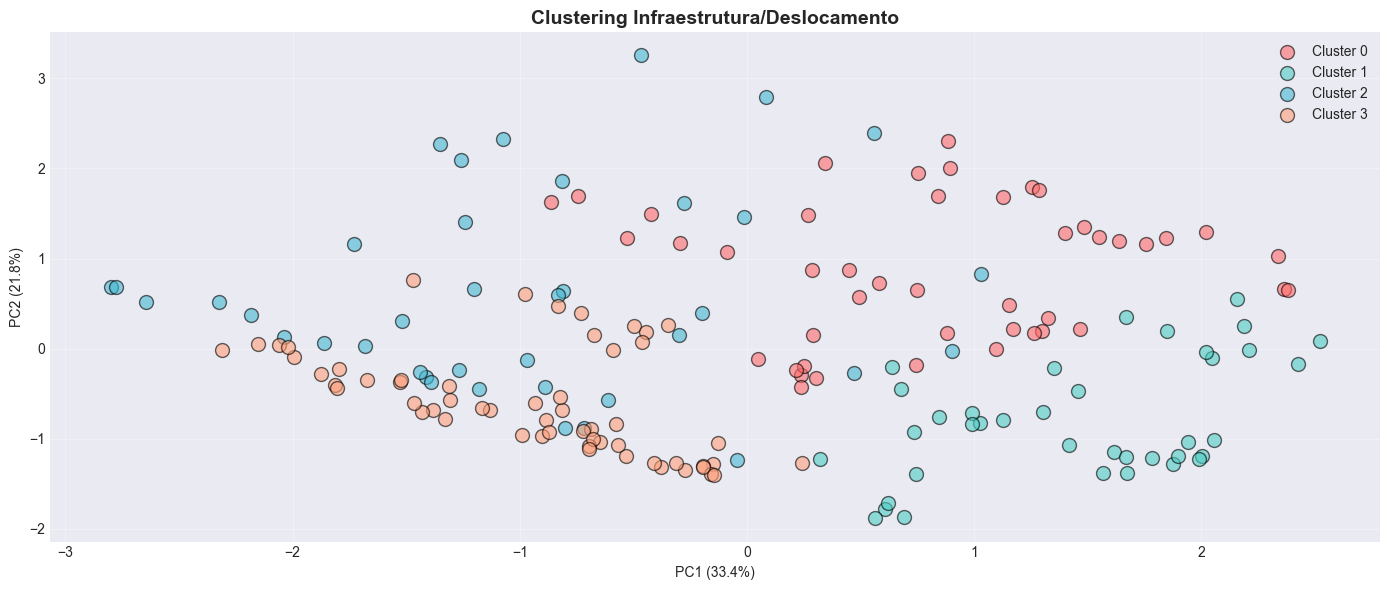


📊 PERFIL DOS CLUSTERS:

Cluster 0 (46 alunos):
  Média Geral: 1.75
  Deslocamento: 79 min
  % Trajeto inseguro: 56.5%
  % Com internet banda larga: 23.9%

Cluster 1 (38 alunos):
  Média Geral: 1.02
  Deslocamento: 102 min
  % Trajeto inseguro: 0.0%
  % Com internet banda larga: 0.0%

Cluster 2 (39 alunos):
  Média Geral: 3.74
  Deslocamento: 44 min
  % Trajeto inseguro: 15.4%
  % Com internet banda larga: 41.0%

Cluster 3 (57 alunos):
  Média Geral: 3.55
  Deslocamento: 22 min
  % Trajeto inseguro: 0.0%
  % Com internet banda larga: 40.4%


In [265]:
# Features de infraestrutura
features_infra = [
    'Media_Geral',
    'Tempo_Deslocamento_Min',
    'Trajeto_Num',
    'Internet_Num',
    'Tem_Computador_Num'
]

X_infra = df_cluster[features_infra].fillna(0)
scaler_infra = StandardScaler()
X_infra_scaled = scaler_infra.fit_transform(X_infra)

# K-Means com K=4
kmeans_infra = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['Cluster_Infra'] = kmeans_infra.fit_predict(X_infra_scaled)

print('CLUSTERING INFRAESTRUTURA (K=4)')
print('='*80)
print(f'Silhouette Score: {silhouette_score(X_infra_scaled, df_cluster["Cluster_Infra"]):.3f}')
print(f'\nDistribuição:')
print(df_cluster['Cluster_Infra'].value_counts().sort_index())

# PCA
pca_infra = PCA(n_components=2)
X_infra_pca = pca_infra.fit_transform(X_infra_scaled)

plt.figure(figsize=(14, 6))
for i in range(4):
    mask = df_cluster['Cluster_Infra'] == i
    plt.scatter(X_infra_pca[mask, 0], X_infra_pca[mask, 1],
               c=colors[i], label=f'Cluster {i}', s=100, alpha=0.6, edgecolors='black')

plt.xlabel(f'PC1 ({pca_infra.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_infra.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Clustering Infraestrutura/Deslocamento', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análise
print('\n📊 PERFIL DOS CLUSTERS:')
for i in range(4):
    cluster_data = df_cluster[df_cluster['Cluster_Infra'] == i]
    print(f'\nCluster {i} ({len(cluster_data)} alunos):')
    print(f'  Média Geral: {cluster_data["Media_Geral"].mean():.2f}')
    print(f'  Deslocamento: {cluster_data["Tempo_Deslocamento_Min"].mean():.0f} min')
    print(f'  % Trajeto inseguro: {(cluster_data["Seguranca_Trajeto"]=="Inseguro").sum()/len(cluster_data)*100:.1f}%')
    print(f'  % Com internet banda larga: {(cluster_data["Acesso_Internet"]=="Sim (banda larga)").sum()/len(cluster_data)*100:.1f}%')

#### Análise por Turma: Infraestrutura

In [267]:
# Clustering Infraestrutura POR TURMA
print('\nCLUSTERING INFRAESTRUTURA POR TURMA')
print('='*80)

for turma in sorted(turmas_unicas):
    df_turma = df_cluster[df_cluster['Turma'] == turma]
    
    print(f'\n{'='*80}')
    print(f'🎓 TURMA {turma} - {len(df_turma)} alunos')
    print(f'{'='*80}')
    
    if len(df_turma) < 10:
        print('⚠️ Turma muito pequena')
        continue
    
    X_turma = df_turma[features_infra].fillna(0)
    X_turma_scaled = scaler_infra.transform(X_turma)
    
    k_turma = min(3, len(df_turma) // 10)
    if k_turma < 2:
        k_turma = 2
    
    kmeans_turma = KMeans(n_clusters=k_turma, random_state=42, n_init=10)
    clusters_turma = kmeans_turma.fit_predict(X_turma_scaled)
    
    for i in range(k_turma):
        mask = clusters_turma == i
        cluster_alunos = df_turma[mask]
        
        if len(cluster_alunos) == 0:
            continue
        
        desl_medio = cluster_alunos['Tempo_Deslocamento_Min'].mean()
        pct_sem_internet = (cluster_alunos['Acesso_Internet'] == 'Não').sum() / len(cluster_alunos) * 100
        
        print(f'\nCluster {i}: {len(cluster_alunos)} alunos')
        print(f'  Média Geral: {cluster_alunos["Media_Geral"].mean():.2f}')
        print(f'  Deslocamento médio: {desl_medio:.0f} min')
        print(f'  % Sem internet: {pct_sem_internet:.1f}%')
        
        if desl_medio > 60:
            print(f'  🚨 ALERTA: Deslocamento longo!')
            print(f'     Ação: Providenciar transporte escolar')
        if pct_sem_internet > 40:
            print(f'  🚨 ALERTA: Muitos sem internet!')
            print(f'     Ação: Fornecer acesso à internet')

print(f'\n{'='*80}')


CLUSTERING INFRAESTRUTURA POR TURMA

🎓 TURMA 1A - 30 alunos

Cluster 0: 15 alunos
  Média Geral: 0.93
  Deslocamento médio: 76 min
  % Sem internet: 0.0%
  🚨 ALERTA: Deslocamento longo!
     Ação: Providenciar transporte escolar

Cluster 1: 7 alunos
  Média Geral: 0.48
  Deslocamento médio: 121 min
  % Sem internet: 100.0%
  🚨 ALERTA: Deslocamento longo!
     Ação: Providenciar transporte escolar
  🚨 ALERTA: Muitos sem internet!
     Ação: Fornecer acesso à internet

Cluster 2: 8 alunos
  Média Geral: 6.35
  Deslocamento médio: 93 min
  % Sem internet: 25.0%
  🚨 ALERTA: Deslocamento longo!
     Ação: Providenciar transporte escolar

🎓 TURMA 1B - 30 alunos

Cluster 0: 8 alunos
  Média Geral: 3.67
  Deslocamento médio: 42 min
  % Sem internet: 12.5%

Cluster 1: 10 alunos
  Média Geral: 0.41
  Deslocamento médio: 96 min
  % Sem internet: 80.0%
  🚨 ALERTA: Deslocamento longo!
     Ação: Providenciar transporte escolar
  🚨 ALERTA: Muitos sem internet!
     Ação: Fornecer acesso à internet


### Síntese: Padrões Descobertos

In [269]:
print('\nSÍNTESE DOS PADRÕES DESCOBERTOS')
print('='*80)

# Encontrar clusters críticos em cada dimensão
print('\n1. SOCIOECONÔMICO - Clusters mais vulneráveis:')
for i in range(4):
    cluster_data = df_cluster[df_cluster['Cluster_Socio'] == i]
    if cluster_data['Media_Geral'].mean() < 4.0:
        print(f'   Cluster {i}: {len(cluster_data)} alunos, média {cluster_data["Media_Geral"].mean():.2f}')
        print(f'      Renda: R$ {cluster_data["Renda_Familiar"].mean():.0f}, {(cluster_data["Trabalha_Fora"]=="Sim").sum()} trabalham')

print('\n2. GÊNERO/COR - Clusters com desigualdade:')
for i in range(4):
    cluster_data = df_cluster[df_cluster['Cluster_Genero_Cor'] == i]
    pct_pretos_pardos = (cluster_data['Cor_Raca'].isin(['Preta', 'Parda', 'Indígena'])).sum() / len(cluster_data) * 100
    if pct_pretos_pardos > 70 and cluster_data['Media_Geral'].mean() < 5.0:
        print(f'   Cluster {i}: {len(cluster_data)} alunos, média {cluster_data["Media_Geral"].mean():.2f}')
        print(f'      {pct_pretos_pardos:.0f}% pretos/pardos/indígenas')

print('\n3. SEGURANÇA ALIMENTAR - Clusters em insegurança:')
for i in range(4):
    cluster_data = df_cluster[df_cluster['Cluster_Alim'] == i]
    pct_inseg = (cluster_data['Seguranca_Alimentar'].str.contains('Insegurança')).sum() / len(cluster_data) * 100
    if pct_inseg > 30:
        print(f'   Cluster {i}: {len(cluster_data)} alunos, média {cluster_data["Media_Geral"].mean():.2f}')
        print(f'      {pct_inseg:.0f}% em insegurança alimentar')

print('\n4. INFRAESTRUTURA - Clusters com precariedade:')
for i in range(4):
    cluster_data = df_cluster[df_cluster['Cluster_Infra'] == i]
    if cluster_data['Tempo_Deslocamento_Min'].mean() > 60 or (cluster_data['Acesso_Internet'] == 'Não').sum() > len(cluster_data) * 0.3:
        print(f'   Cluster {i}: {len(cluster_data)} alunos, média {cluster_data["Media_Geral"].mean():.2f}')
        print(f'      Deslocamento: {cluster_data["Tempo_Deslocamento_Min"].mean():.0f} min')
        print(f'      {(cluster_data["Acesso_Internet"]=="Não").sum()} sem internet')

print('\n' + '='*80)
print('Clustering por categorias revela padrões específicos em cada dimensão!')


SÍNTESE DOS PADRÕES DESCOBERTOS

1. SOCIOECONÔMICO - Clusters mais vulneráveis:
   Cluster 0: 52 alunos, média 1.05
      Renda: R$ 1146, 0 trabalham
   Cluster 1: 39 alunos, média 2.90
      Renda: R$ 1976, 39 trabalham
   Cluster 2: 45 alunos, média 1.20
      Renda: R$ 2024, 45 trabalham

2. GÊNERO/COR - Clusters com desigualdade:
   Cluster 0: 53 alunos, média 1.04
      77% pretos/pardos/indígenas
   Cluster 1: 42 alunos, média 1.99
      81% pretos/pardos/indígenas
   Cluster 3: 36 alunos, média 1.29
      81% pretos/pardos/indígenas

3. SEGURANÇA ALIMENTAR - Clusters em insegurança:
   Cluster 2: 46 alunos, média 1.17
      100% em insegurança alimentar
   Cluster 3: 36 alunos, média 2.59
      31% em insegurança alimentar

4. INFRAESTRUTURA - Clusters com precariedade:
   Cluster 0: 46 alunos, média 1.75
      Deslocamento: 79 min
      4 sem internet
   Cluster 1: 38 alunos, média 1.02
      Deslocamento: 102 min
      33 sem internet

Clustering por categorias revela padrões

## 6. Exportacao de Dados

### 5.6 Score de Risco

Vamos criar um **Score de Risco** (0-6) baseado em fatores sociais críticos:

In [270]:
# Calcular Score de Risco (0-6 pontos)
df['Score_Risco'] = 0

# 1 ponto: Trabalha fora
df.loc[df['Trabalha_Fora'] == 'Sim', 'Score_Risco'] += 1

# 1 ponto: Renda baixa (<R$ 1500)
df.loc[df['Renda_Familiar'] < 1500, 'Score_Risco'] += 1

# 1 ponto: Deslocamento longo (>60 min)
df.loc[df['Tempo_Deslocamento_Min'] > 60, 'Score_Risco'] += 1

# 1 ponto: Sem internet
df.loc[df['Acesso_Internet'] == 'Não', 'Score_Risco'] += 1

# 1 ponto: Insegurança alimentar
df.loc[df['Seguranca_Alimentar'].str.contains('Insegurança'), 'Score_Risco'] += 1

# 1 ponto: Frequência baixa (<85%)
df.loc[df['Frequencia_Percentual'] < 85, 'Score_Risco'] += 1

# Classificar nível de risco
df['Nivel_Risco'] = 'Baixo'
df.loc[df['Score_Risco'] >= 2, 'Nivel_Risco'] = 'Médio'
df.loc[df['Score_Risco'] >= 4, 'Nivel_Risco'] = 'Alto'

print('📊 DISTRIBUIÇÃO DO SCORE DE RISCO')
print('='*80)
print(f'\nScore 0-1 (Baixo): {(df["Nivel_Risco"]=="Baixo").sum()} alunos ({(df["Nivel_Risco"]=="Baixo").sum()/len(df)*100:.1f}%)')
print(f'Score 2-3 (Médio): {(df["Nivel_Risco"]=="Médio").sum()} alunos ({(df["Nivel_Risco"]=="Médio").sum()/len(df)*100:.1f}%)')
print(f'Score 4-6 (Alto): {(df["Nivel_Risco"]=="Alto").sum()} alunos ({(df["Nivel_Risco"]=="Alto").sum()/len(df)*100:.1f}%)')

print(f'\n🚨 ALUNOS EM RISCO ALTO (Score ≥4):')
alunos_alto_risco = df[df['Nivel_Risco'] == 'Alto'].sort_values('Score_Risco', ascending=False)
print(f'Total: {len(alunos_alto_risco)} alunos\n')

for idx, row in alunos_alto_risco.head(5).iterrows():
    print(f'{row["Nome_Aluno"]} (Turma {row["Turma"]}) - Score: {row["Score_Risco"]}/6')
    print(f'  Média: {row["Media_Geral"]:.1f}')
    fatores = []
    if row['Trabalha_Fora'] == 'Sim':
        fatores.append(f'trabalha {row["Horas_Trabalho_Semana"]:.0f}h/sem')
    if row['Renda_Familiar'] < 1500:
        fatores.append(f'renda R${row["Renda_Familiar"]:.0f}')
    if row['Tempo_Deslocamento_Min'] > 60:
        fatores.append(f'desloc. {row["Tempo_Deslocamento_Min"]:.0f}min')
    if row['Acesso_Internet'] == 'Não':
        fatores.append('sem internet')
    if 'Insegurança' in row['Seguranca_Alimentar']:
        fatores.append('inseg. alimentar')
    if row['Frequencia_Percentual'] < 85:
        fatores.append(f'freq. {row["Frequencia_Percentual"]:.0f}%')
    print(f'  Fatores: {" | ".join(fatores)}\n')

if len(alunos_alto_risco) > 5:
    print(f'... e mais {len(alunos_alto_risco)-5} alunos')

print('\n' + '='*80)

📊 DISTRIBUIÇÃO DO SCORE DE RISCO

Score 0-1 (Baixo): 41 alunos (22.8%)
Score 2-3 (Médio): 84 alunos (46.7%)
Score 4-6 (Alto): 55 alunos (30.6%)

🚨 ALUNOS EM RISCO ALTO (Score ≥4):
Total: 55 alunos

Pedro Ferreira Lima (Turma 3A) - Score: 6/6
  Média: 0.1
  Fatores: trabalha 21h/sem | renda R$1200 | desloc. 95min | sem internet | inseg. alimentar | freq. 70%

Vinicius Moreira Araújo (Turma 1A) - Score: 5/6
  Média: 0.8
  Fatores: renda R$1007 | desloc. 140min | sem internet | inseg. alimentar | freq. 70%

Claudia Santos Lopes (Turma 3A) - Score: 5/6
  Média: 0.0
  Fatores: renda R$614 | desloc. 149min | sem internet | inseg. alimentar | freq. 70%

Carolina Araújo Costa (Turma 1B) - Score: 5/6
  Média: 0.0
  Fatores: renda R$775 | desloc. 114min | sem internet | inseg. alimentar | freq. 70%

Miguel Nunes Costa (Turma 3A) - Score: 5/6
  Média: 6.2
  Fatores: trabalha 30h/sem | renda R$1200 | desloc. 111min | inseg. alimentar | freq. 74%

... e mais 50 alunos



In [ ]:
# Adicionar lista de alunos a cada cluster
print("="*80)
print("🔄 ADICIONANDO ALUNOS AOS CLUSTERS...")
print("="*80)

# Criar colunas numéricas se ainda não existem
if 'Trabalha_Num' not in df.columns:
    print("\n📊 Preparando dados para clustering...")
    df['Trabalha_Num'] = (df['Trabalha_Fora'] == 'Sim').astype(int)
    
if 'Tem_Internet_Num' not in df.columns:
    df['Tem_Internet_Num'] = df['Acesso_Internet'].apply(lambda x: 0 if x == 'Não' else 1)

if 'Cor_Raca_Num' not in df.columns:
    raca_map = {'Branca': 0, 'Preta': 1, 'Parda': 1, 'Indígena': 1}
    df['Cor_Raca_Num'] = df['Cor_Raca'].map(raca_map)

if 'Seg_Alimentar_Num' not in df.columns:
    seg_alim_map = {'Segura': 0, 'Leve Insegurança': 1, 'Moderada Insegurança': 2, 'Grave Insegurança': 3}
    df['Seg_Alimentar_Num'] = df['Seguranca_Alimentar'].map(seg_alim_map)
    print("   ✅ Dados preparados!")

# Fazer clustering global se ainda não foi feito
if 'Cluster_Global' not in df.columns:
    print("\n🔍 Executando clustering global...")
    
    # Features para clustering global
    features_global = ['Media_Geral', 'Renda_Familiar', 'Trabalha_Num', 'Tempo_Deslocamento_Min', 
                       'Cor_Raca_Num', 'Seg_Alimentar_Num']
    
    X_global = df[features_global].fillna(0)
    
    # Escalar features
    scaler_global = StandardScaler()
    X_scaled_global = scaler_global.fit_transform(X_global)
    
    # Clustering global (4 clusters)
    kmeans_global = KMeans(n_clusters=4, random_state=42, n_init=10)
    df['Cluster_Global'] = kmeans_global.fit_predict(X_scaled_global)
    
    print("   ✅ Clustering global concluído!")
else:
    # Garantir que features_global está definido
    features_global = ['Media_Geral', 'Renda_Familiar', 'Trabalha_Num', 'Tempo_Deslocamento_Min', 
                       'Cor_Raca_Num', 'Seg_Alimentar_Num']

# Ler o JSON atual
with open('dados_dashboard.json', 'r', encoding='utf-8') as f:
    dashboard = json.load(f)

# Adicionar alunos aos clusters globais
for cluster in dashboard['clusters_globais']:
    cluster_id = cluster['cluster_id']
    alunos_cluster = df[df['Cluster_Global'] == cluster_id]
    
    cluster['alunos'] = []
    for _, aluno in alunos_cluster.iterrows():
        aluno_dict = {
            'id': int(aluno['ID']),
            'escola': aluno['Escola'],
            'endereco_escola': aluno['Endereco_Escola'],
            'serie': aluno['Serie'],
            'turma': aluno['Turma'],
            'nome_aluno': aluno['Nome_Aluno'],
            'genero': aluno['Genero'],
            'idade_aluno': int(aluno['Idade_Aluno']),
            'cpf_aluno': aluno['CPF_Aluno'],
            'telefone_aluno': aluno['Telefone_Aluno'],
            'endereco_completo': aluno['Endereco_Completo'],
            'municipio': aluno['Municipio'],
            'uf': aluno['UF'],
            'cep': aluno['CEP'],
            'deficiencia': aluno['Deficiencia'],
            'nome_responsavel': aluno['Nome_Responsavel'],
            'parentesco': aluno['Parentesco'],
            'cpf_responsavel': aluno['CPF_Responsavel'],
            'telefone_responsavel': aluno['Telefone_Responsavel'],
            'protocolo': aluno['Protocolo'],
            'status_matricula': aluno['Status_Matricula'],
            'renda_familiar': int(aluno['Renda_Familiar']),
            'tem_irmaos': aluno['Tem_Irmaos'],
            'numero_irmaos': int(aluno['Numero_Irmaos']) if pd.notna(aluno['Numero_Irmaos']) else 0,
            'idades_irmaos': aluno['Idades_Irmaos'] if pd.notna(aluno['Idades_Irmaos']) else '',
            'trabalha_fora': aluno['Trabalha_Fora'],
            'horas_trabalho_semana': int(aluno['Horas_Trabalho_Semana']) if pd.notna(aluno['Horas_Trabalho_Semana']) else 0,
            'tipo_trabalho': aluno['Tipo_Trabalho'] if pd.notna(aluno['Tipo_Trabalho']) else '',
            'tempo_deslocamento_min': int(aluno['Tempo_Deslocamento_Min']),
            'meio_transporte': aluno['Meio_Transporte'],
            'acesso_internet': aluno['Acesso_Internet'],
            'tem_computador': aluno['Tem_Computador'],
            'apoio_familiar_estudos': aluno['Apoio_Familiar_Estudos'],
            'faz_refeicao_escola': aluno['Faz_Refeicao_Escola'],
            'matematica_1bim': round(float(aluno['Matematica_1Bim']), 2),
            'matematica_2bim': round(float(aluno['Matematica_2Bim']), 2),
            'matematica_3bim': round(float(aluno['Matematica_3Bim']), 2),
            'matematica_4bim': round(float(aluno['Matematica_4Bim']), 2),
            'media_matematica': round(float(aluno['Media_Matematica']), 2),
            'portugues_1bim': round(float(aluno['Portugues_1Bim']), 2),
            'portugues_2bim': round(float(aluno['Portugues_2Bim']), 2),
            'portugues_3bim': round(float(aluno['Portugues_3Bim']), 2),
            'portugues_4bim': round(float(aluno['Portugues_4Bim']), 2),
            'media_portugues': round(float(aluno['Media_Portugues']), 2),
            'media_geral': round(float(aluno['Media_Geral']), 2),
            'frequencia_percentual': int(aluno['Frequencia_Percentual']),
            'cor_raca': aluno['Cor_Raca'],
            'area_climatica': aluno['Area_Climatica'],
            'impacto_seca': aluno['Impacto_Seca'],
            'area_risco_ambiental': aluno['Area_Risco_Ambiental'] if pd.notna(aluno['Area_Risco_Ambiental']) else 'Não',
            'seguranca_trajeto': aluno['Seguranca_Trajeto'],
            'refeicoes_diarias': int(aluno['Refeicoes_Diarias']),
            'seguranca_alimentar': aluno['Seguranca_Alimentar'],
            'ambiente_familiar': aluno['Ambiente_Familiar'],
            'responsabilidades_casa': aluno['Responsabilidades_Casa']
        }
        cluster['alunos'].append(aluno_dict)

print(f"\n✅ Clusters globais atualizados:")
for cluster in dashboard['clusters_globais']:
    print(f"   Cluster {cluster['cluster_id']}: {len(cluster['alunos'])} alunos")

# Adicionar alunos aos clusters por turma
print(f"\n✅ Processando clusters por turma:")
for turma_data in dashboard['dados_por_turma']:
    turma = turma_data['turma']
    df_turma = df[df['Turma'] == turma].copy()
    
    if len(df_turma) == 0:
        continue
    
    # Fazer clustering por turma
    col_name = f'Cluster_{turma}'
    if col_name not in df.columns:
        # Fazer clustering para esta turma
        X_turma = df_turma[features_global].fillna(0)
        scaler_turma = StandardScaler()
        X_scaled_turma = scaler_turma.fit_transform(X_turma)
        
        n_clusters_turma = min(3, len(df_turma))
        if n_clusters_turma >= 2:
            kmeans_turma = KMeans(n_clusters=n_clusters_turma, random_state=42, n_init=10)
            cluster_labels = kmeans_turma.fit_predict(X_scaled_turma)
            
            # Adicionar ao dataframe principal
            df.loc[df['Turma'] == turma, col_name] = cluster_labels
    
    # Adicionar alunos aos clusters
    for cluster in turma_data['clusters_turma']:
        cluster_id = cluster['cluster_id']
        
        if col_name in df.columns:
            alunos_cluster = df[(df['Turma'] == turma) & (df[col_name] == cluster_id)]
        else:
            # Fallback: dividir proporcionalmente
            n_clusters = len(turma_data['clusters_turma'])
            alunos_cluster = df_turma.iloc[cluster_id::n_clusters]
        
        cluster['alunos'] = []
        for _, aluno in alunos_cluster.iterrows():
            aluno_dict = {
                'id': int(aluno['ID']),
                'escola': aluno['Escola'],
                'endereco_escola': aluno['Endereco_Escola'],
                'serie': aluno['Serie'],
                'turma': aluno['Turma'],
                'nome_aluno': aluno['Nome_Aluno'],
                'genero': aluno['Genero'],
                'idade_aluno': int(aluno['Idade_Aluno']),
                'cpf_aluno': aluno['CPF_Aluno'],
                'telefone_aluno': aluno['Telefone_Aluno'],
                'endereco_completo': aluno['Endereco_Completo'],
                'municipio': aluno['Municipio'],
                'uf': aluno['UF'],
                'cep': aluno['CEP'],
                'deficiencia': aluno['Deficiencia'],
                'nome_responsavel': aluno['Nome_Responsavel'],
                'parentesco': aluno['Parentesco'],
                'cpf_responsavel': aluno['CPF_Responsavel'],
                'telefone_responsavel': aluno['Telefone_Responsavel'],
                'protocolo': aluno['Protocolo'],
                'status_matricula': aluno['Status_Matricula'],
                'renda_familiar': int(aluno['Renda_Familiar']),
                'tem_irmaos': aluno['Tem_Irmaos'],
                'numero_irmaos': int(aluno['Numero_Irmaos']) if pd.notna(aluno['Numero_Irmaos']) else 0,
                'idades_irmaos': aluno['Idades_Irmaos'] if pd.notna(aluno['Idades_Irmaos']) else '',
                'trabalha_fora': aluno['Trabalha_Fora'],
                'horas_trabalho_semana': int(aluno['Horas_Trabalho_Semana']) if pd.notna(aluno['Horas_Trabalho_Semana']) else 0,
                'tipo_trabalho': aluno['Tipo_Trabalho'] if pd.notna(aluno['Tipo_Trabalho']) else '',
                'tempo_deslocamento_min': int(aluno['Tempo_Deslocamento_Min']),
                'meio_transporte': aluno['Meio_Transporte'],
                'acesso_internet': aluno['Acesso_Internet'],
                'tem_computador': aluno['Tem_Computador'],
                'apoio_familiar_estudos': aluno['Apoio_Familiar_Estudos'],
                'faz_refeicao_escola': aluno['Faz_Refeicao_Escola'],
                'matematica_1bim': round(float(aluno['Matematica_1Bim']), 2),
                'matematica_2bim': round(float(aluno['Matematica_2Bim']), 2),
                'matematica_3bim': round(float(aluno['Matematica_3Bim']), 2),
                'matematica_4bim': round(float(aluno['Matematica_4Bim']), 2),
                'media_matematica': round(float(aluno['Media_Matematica']), 2),
                'portugues_1bim': round(float(aluno['Portugues_1Bim']), 2),
                'portugues_2bim': round(float(aluno['Portugues_2Bim']), 2),
                'portugues_3bim': round(float(aluno['Portugues_3Bim']), 2),
                'portugues_4bim': round(float(aluno['Portugues_4Bim']), 2),
                'media_portugues': round(float(aluno['Media_Portugues']), 2),
                'media_geral': round(float(aluno['Media_Geral']), 2),
                'frequencia_percentual': int(aluno['Frequencia_Percentual']),
                'cor_raca': aluno['Cor_Raca'],
                'area_climatica': aluno['Area_Climatica'],
                'impacto_seca': aluno['Impacto_Seca'],
                'area_risco_ambiental': aluno['Area_Risco_Ambiental'] if pd.notna(aluno['Area_Risco_Ambiental']) else 'Não',
                'seguranca_trajeto': aluno['Seguranca_Trajeto'],
                'refeicoes_diarias': int(aluno['Refeicoes_Diarias']),
                'seguranca_alimentar': aluno['Seguranca_Alimentar'],
                'ambiente_familiar': aluno['Ambiente_Familiar'],
                'responsabilidades_casa': aluno['Responsabilidades_Casa']
            }
            cluster['alunos'].append(aluno_dict)
    
    print(f"   {turma}: {len(turma_data['clusters_turma'])} clusters")
    for cluster in turma_data['clusters_turma']:
        print(f"      Cluster {cluster['cluster_id']}: {len(cluster['alunos'])} alunos")

# with open('dados_dashboard.json', 'w', encoding='utf-8') as f:
#     json.dump(dashboard, f, ensure_ascii=False, indent=2)

print("\n" + "="*80)
